In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE

# Data Preprocessing

In [2]:
fifa = pd.read_csv('data.csv')
fifa.shape

(18207, 89)

In [3]:
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
fifa.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [5]:
new_fifa = fifa.drop(columns = ['Unnamed: 0', 'ID', 'Age', 'Photo', 'Nationality', 'Flag',
                                'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special', 
                                'Preferred Foot', 'International Reputation', 'Weak Foot', 
                                'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 
                                'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until', 
                                'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 
                                'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 
                                'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Release Clause'])
new_fifa

,Name,Overall,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,94,RF,84.0,95.0,70.0,90.0,86.0,97.0,93.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,Cristiano Ronaldo,94,ST,84.0,94.0,89.0,81.0,87.0,88.0,81.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,Neymar Jr,92,LW,79.0,87.0,62.0,84.0,84.0,96.0,88.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,De Gea,91,GK,17.0,13.0,21.0,50.0,13.0,18.0,21.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,K. De Bruyne,91,RCM,93.0,82.0,55.0,92.0,82.0,86.0,85.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,47,CM,34.0,38.0,40.0,49.0,25.0,42.0,30.0,...,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0
18203,N. Christoffersson,47,ST,23.0,52.0,52.0,43.0,36.0,39.0,32.0,...,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0
18204,B. Worman,47,ST,25.0,40.0,46.0,38.0,38.0,45.0,38.0,...,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0
18205,D. Walker-Rice,47,RW,44.0,50.0,39.0,42.0,40.0,51.0,34.0,...,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0


In [6]:
new_fifa = new_fifa.dropna(axis = 0, how = 'any')
new_fifa

,Name,Overall,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,94,RF,84.0,95.0,70.0,90.0,86.0,97.0,93.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,Cristiano Ronaldo,94,ST,84.0,94.0,89.0,81.0,87.0,88.0,81.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,Neymar Jr,92,LW,79.0,87.0,62.0,84.0,84.0,96.0,88.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,De Gea,91,GK,17.0,13.0,21.0,50.0,13.0,18.0,21.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,K. De Bruyne,91,RCM,93.0,82.0,55.0,92.0,82.0,86.0,85.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,47,CM,34.0,38.0,40.0,49.0,25.0,42.0,30.0,...,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0
18203,N. Christoffersson,47,ST,23.0,52.0,52.0,43.0,36.0,39.0,32.0,...,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0
18204,B. Worman,47,ST,25.0,40.0,46.0,38.0,38.0,45.0,38.0,...,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0
18205,D. Walker-Rice,47,RW,44.0,50.0,39.0,42.0,40.0,51.0,34.0,...,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0


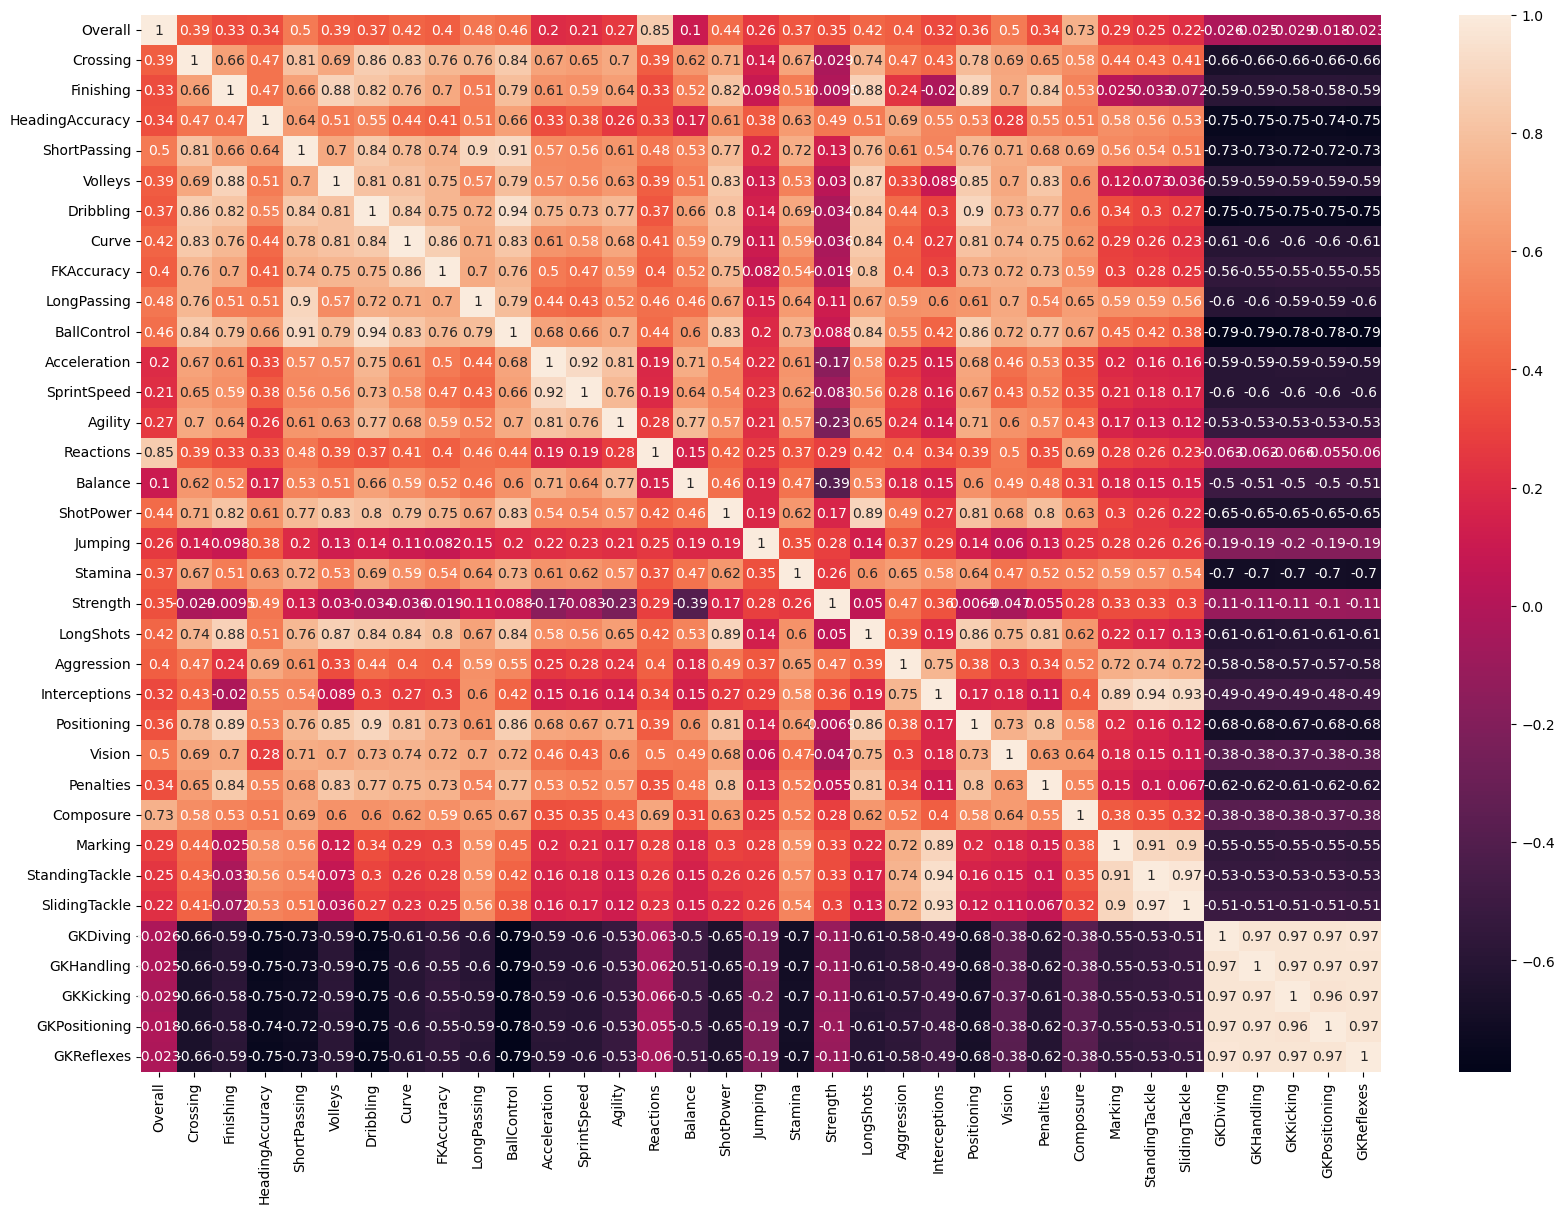

In [7]:
new_fifa_corr = new_fifa.drop(columns = ['Name', 'Position']).corr()
plt.figure(figsize=(20,14), dpi=100, facecolor='w', edgecolor='k', frameon='True')
sns.heatmap(new_fifa_corr, annot=True)
plt.savefig('corr.png')
plt.show()

In [8]:
y = new_fifa.iloc[:, 1]
X = new_fifa.iloc[:, 3:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12702, 34)
(5445, 34)
(12702,)
(5445,)


In [12]:
lm = sm.add_constant(X_train)
lr = sm.OLS(y_train, lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                Overall   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     2256.
Date:                Sun, 12 Dec 2021   Prob (F-statistic):               0.00
Time:                        13:24:39   Log-Likelihood:                -30204.
No. Observations:               12702   AIC:                         6.048e+04
Df Residuals:                   12667   BIC:                         6.074e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              10.1201      0.315     

In [13]:
new_fifa = new_fifa.drop(columns = ['Volleys', 'FKAccuracy', 'Agility', 'Jumping', 'Aggression', 'Interceptions', 'Penalties'])
new_fifa.head()

,Name,Overall,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Dribbling,Curve,LongPassing,...,Vision,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,94,RF,84.0,95.0,70.0,90.0,97.0,93.0,87.0,...,94.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,Cristiano Ronaldo,94,ST,84.0,94.0,89.0,81.0,88.0,81.0,77.0,...,82.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,Neymar Jr,92,LW,79.0,87.0,62.0,84.0,96.0,88.0,78.0,...,87.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,De Gea,91,GK,17.0,13.0,21.0,50.0,18.0,21.0,51.0,...,68.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,K. De Bruyne,91,RCM,93.0,82.0,55.0,92.0,86.0,85.0,91.0,...,94.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [14]:
y = new_fifa.iloc[:, 1]
X = new_fifa.iloc[:, 3:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [15]:
lm = sm.add_constant(X_train)
lr = sm.OLS(y_train, lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                Overall   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     2840.
Date:                Sun, 12 Dec 2021   Prob (F-statistic):               0.00
Time:                        13:24:39   Log-Likelihood:                -30209.
No. Observations:               12702   AIC:                         6.047e+04
Df Residuals:                   12674   BIC:                         6.068e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              10.2639      0.308     

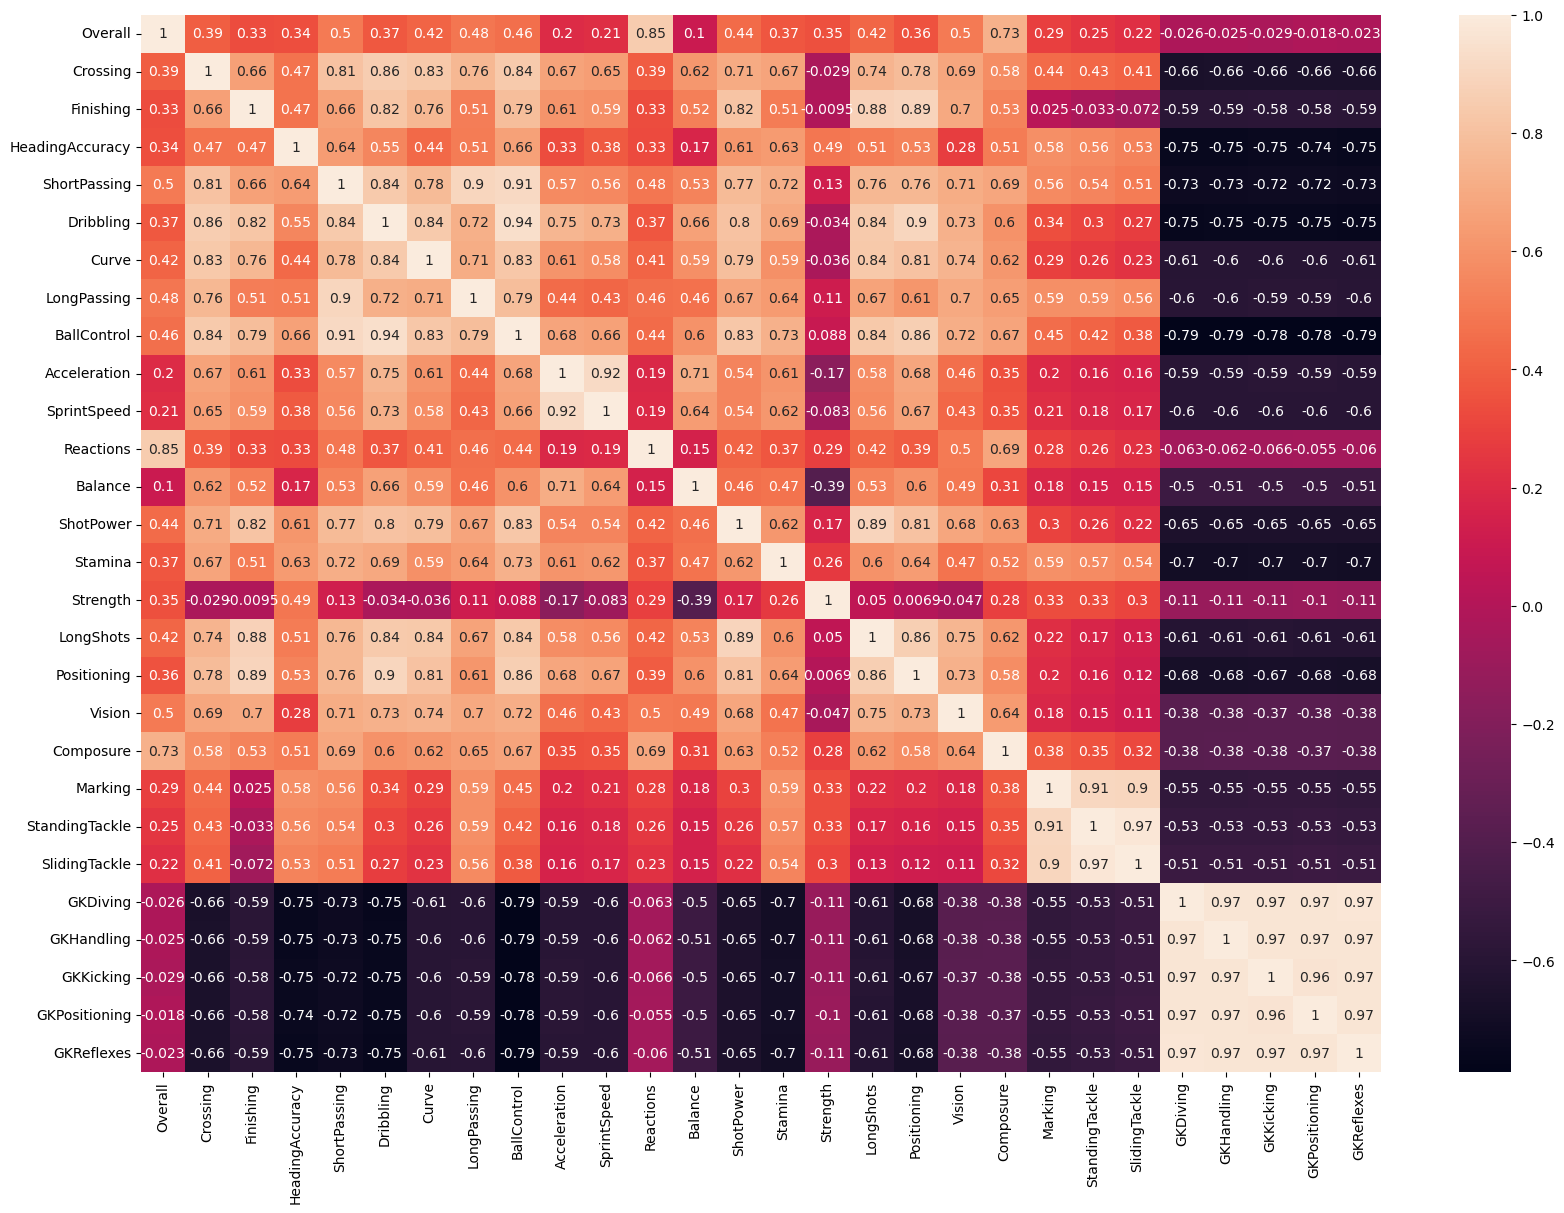

In [16]:
new_fifa_corr = new_fifa.drop(columns = ['Name', 'Position']).corr()
plt.figure(figsize=(20,14), dpi=100, facecolor='w', edgecolor='k', frameon='True')
sns.heatmap(new_fifa_corr, annot=True)
plt.savefig('corr1.png')
plt.show()

# Training

## Linear Regression

In [17]:
lm_test = sm.add_constant(X_test)
lr_pred = lr.predict(lm_test)

## Decision Tree

In [18]:
dt = DecisionTreeRegressor(random_state = 42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [19]:
dt_pred = dt.predict(X_test)

## Random Forest

In [20]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [21]:
rf_pred = rf.predict(X_test)

# Evaluation

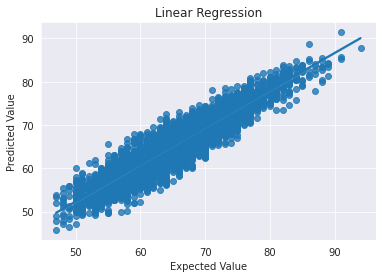

In [22]:
sns.set_style("darkgrid")
sns.regplot(x = y_test, y = lr_pred)
plt.title('Linear Regression')
plt.xlabel('Expected Value')
plt.ylabel('Predicted Value')
plt.savefig('lr1.png')
plt.show()

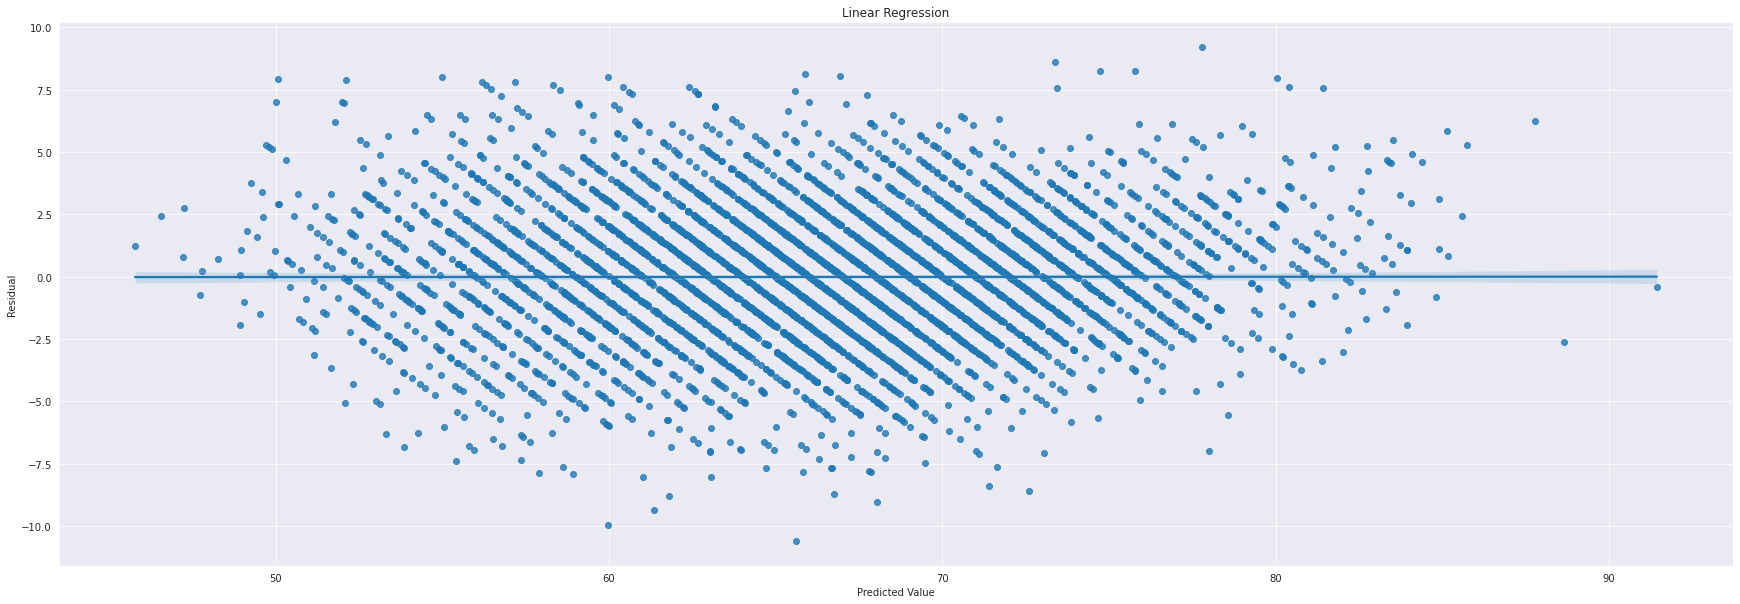

In [23]:
fig = plt.figure(figsize=(30,10))
sns.regplot(x = lr_pred, y = (y_test - lr_pred))
plt.title('Linear Regression')
plt.xlabel('Predicted Value')
plt.ylabel('Residual')
plt.savefig('lr2.png')
plt.show()

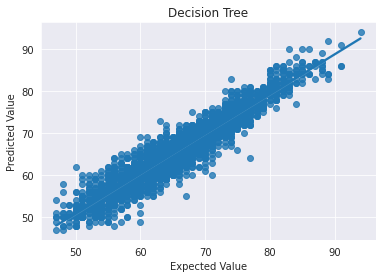

In [24]:
sns.regplot(x = y_test, y = dt_pred)
plt.title('Decision Tree')
plt.xlabel('Expected Value')
plt.ylabel('Predicted Value')
plt.savefig('dt1.png')
plt.show()

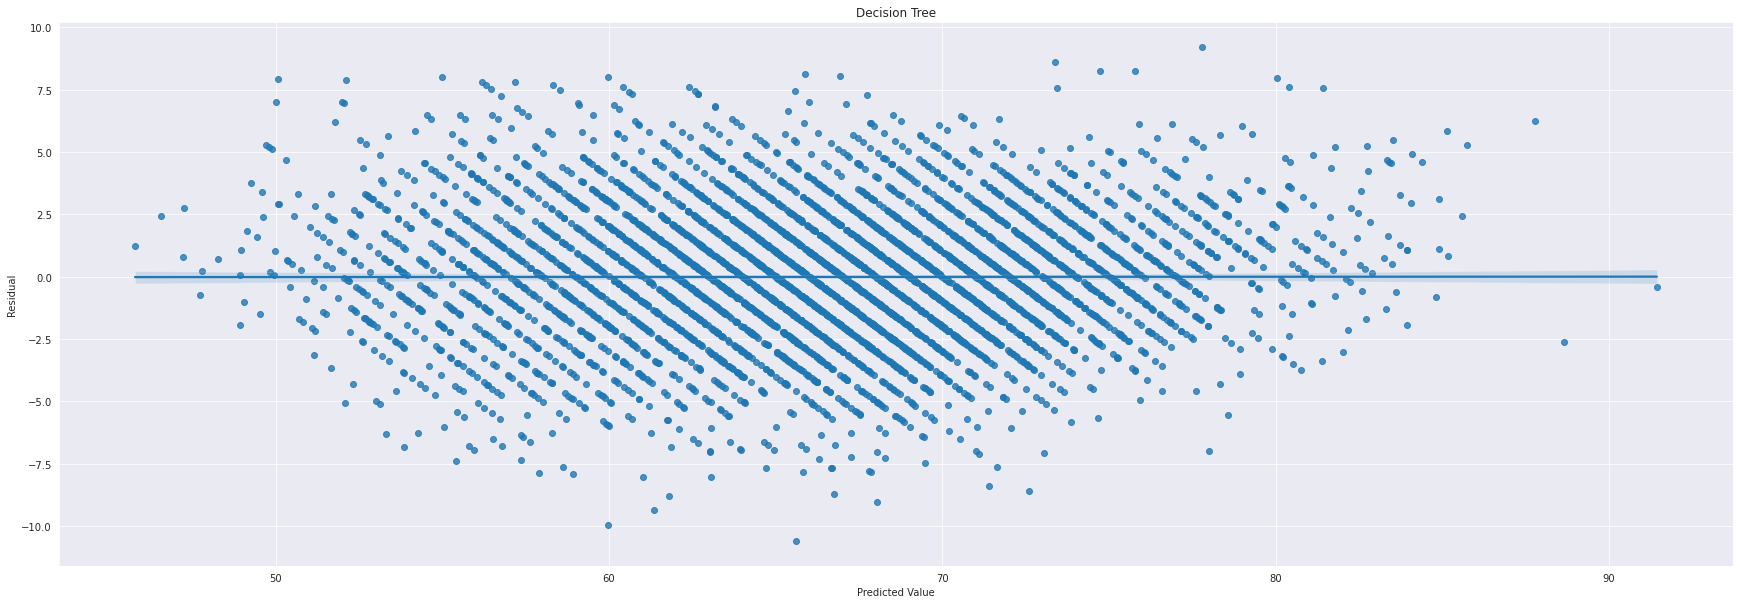

In [25]:
fig = plt.figure(figsize=(30,10))
sns.regplot(x = lr_pred, y = (y_test - lr_pred))
plt.title('Decision Tree')
plt.xlabel('Predicted Value')
plt.ylabel('Residual')
plt.savefig('dt2.png')
plt.show()

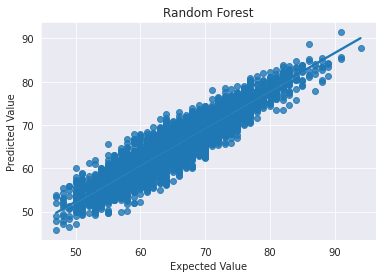

In [26]:
sns.regplot(x = y_test, y = lr_pred)
plt.title('Random Forest')
plt.xlabel('Expected Value')
plt.ylabel('Predicted Value')
plt.savefig('rf1.png')
plt.show()

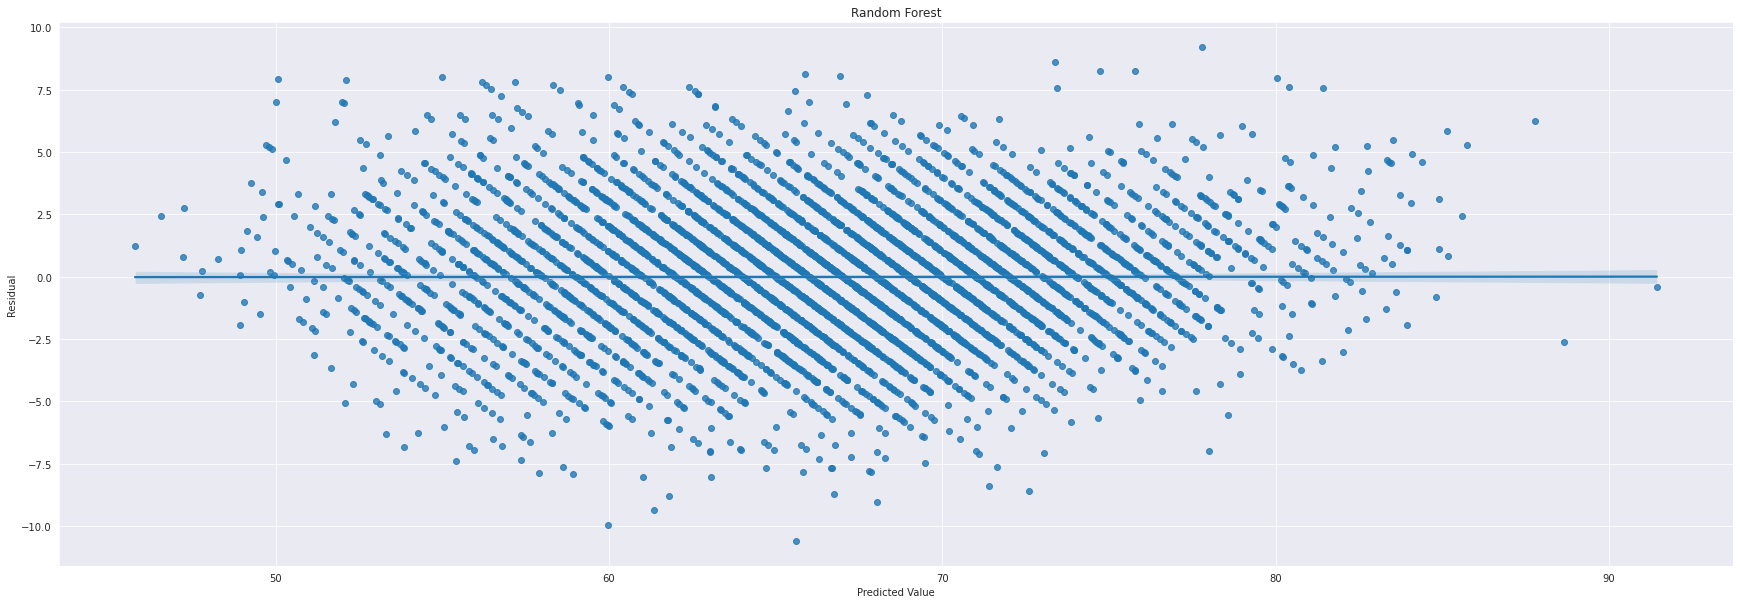

In [27]:
fig = plt.figure(figsize=(30,10))
sns.regplot(x = lr_pred, y = (y_test - lr_pred))
plt.title('Random Forest')
plt.xlabel('Predicted Value')
plt.ylabel('Residual')
plt.savefig('rf2.png')
plt.show()

In [28]:
print('R2 Score: {}'.format(r2_score(y_test, lr_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(y_test, lr_pred)))

R2 Score: 0.8581227245507479
Mean Squared Error: 6.703216470573038


In [29]:
print('R2 Score: {}'.format(r2_score(y_test, dt_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(y_test, dt_pred)))

R2 Score: 0.8959020243778092
Mean Squared Error: 4.918273645546373


In [30]:
print('R2 Score: {}'.format(r2_score(y_test, rf_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(y_test, rf_pred)))

R2 Score: 0.9626635786829875
Mean Squared Error: 1.764018328741965


# Training w/o GK

In [33]:
GK = new_fifa[new_fifa.Position == "GK"].drop(columns = ['Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Dribbling',
       'Curve', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Reactions', 'Balance', 'ShotPower',
       'Stamina', 'Strength', 'LongShots',
       'Positioning', 'Vision', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle'])
GK

,Name,Overall,Position,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
3,De Gea,91,GK,90.0,85.0,87.0,88.0,94.0
9,J. Oblak,90,GK,86.0,92.0,78.0,88.0,89.0
18,M. ter Stegen,89,GK,87.0,85.0,88.0,85.0,90.0
19,T. Courtois,89,GK,85.0,91.0,72.0,86.0,88.0
22,M. Neuer,89,GK,90.0,86.0,91.0,87.0,87.0
...,...,...,...,...,...,...,...,...
18178,L. Wahlstedt,48,GK,47.0,46.0,50.0,45.0,51.0
18180,M. Hurst,48,GK,45.0,49.0,50.0,50.0,45.0
18183,K. Pilkington,48,GK,45.0,48.0,44.0,49.0,46.0
18194,J. Milli,47,GK,52.0,52.0,52.0,40.0,44.0


In [34]:
new_fifa = new_fifa[new_fifa.Position != "GK"].drop(columns = ['GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'])
new_fifa

,Name,Overall,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Dribbling,Curve,LongPassing,...,ShotPower,Stamina,Strength,LongShots,Positioning,Vision,Composure,Marking,StandingTackle,SlidingTackle
0,L. Messi,94,RF,84.0,95.0,70.0,90.0,97.0,93.0,87.0,...,85.0,72.0,59.0,94.0,94.0,94.0,96.0,33.0,28.0,26.0
1,Cristiano Ronaldo,94,ST,84.0,94.0,89.0,81.0,88.0,81.0,77.0,...,95.0,88.0,79.0,93.0,95.0,82.0,95.0,28.0,31.0,23.0
2,Neymar Jr,92,LW,79.0,87.0,62.0,84.0,96.0,88.0,78.0,...,80.0,81.0,49.0,82.0,89.0,87.0,94.0,27.0,24.0,33.0
4,K. De Bruyne,91,RCM,93.0,82.0,55.0,92.0,86.0,85.0,91.0,...,91.0,90.0,75.0,91.0,87.0,94.0,88.0,68.0,58.0,51.0
5,E. Hazard,91,LF,81.0,84.0,61.0,89.0,95.0,83.0,83.0,...,82.0,83.0,66.0,80.0,87.0,89.0,91.0,34.0,27.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,47,CM,34.0,38.0,40.0,49.0,42.0,30.0,45.0,...,43.0,40.0,47.0,38.0,39.0,52.0,45.0,40.0,48.0,47.0
18203,N. Christoffersson,47,ST,23.0,52.0,52.0,43.0,39.0,32.0,25.0,...,41.0,43.0,67.0,42.0,46.0,33.0,42.0,22.0,15.0,19.0
18204,B. Worman,47,ST,25.0,40.0,46.0,38.0,45.0,38.0,28.0,...,45.0,55.0,32.0,45.0,48.0,43.0,41.0,32.0,13.0,11.0
18205,D. Walker-Rice,47,RW,44.0,50.0,39.0,42.0,51.0,34.0,32.0,...,64.0,40.0,48.0,34.0,44.0,47.0,46.0,20.0,25.0,27.0


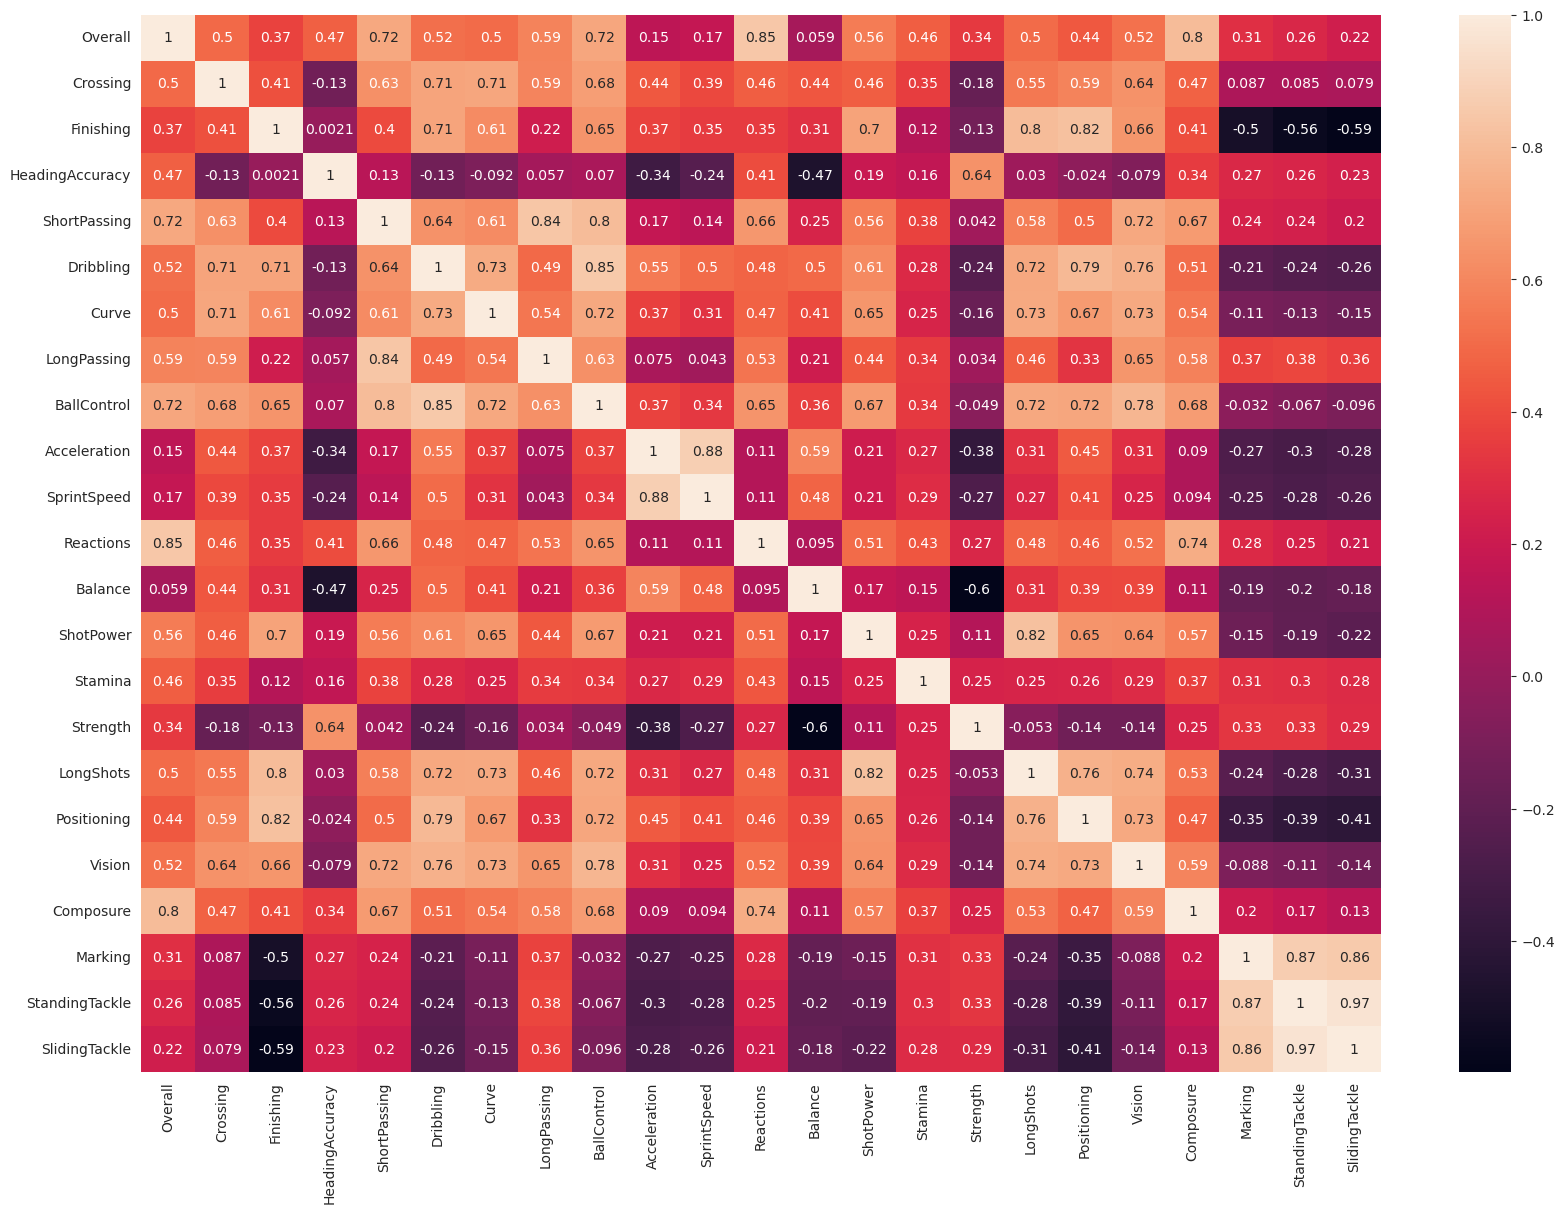

In [35]:
new_fifa_corr = new_fifa.drop(columns = ['Name', 'Position']).corr()
plt.figure(figsize=(20,14), dpi=100, facecolor='w', edgecolor='k', frameon='True')
sns.heatmap(new_fifa_corr, annot=True)
plt.show()

In [37]:
y = new_fifa.iloc[:, 1].values
X = new_fifa.iloc[:, 3:].values

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [39]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11285, 22)
(4837, 22)
(11285,)
(4837,)


## Linear Regression

In [40]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [41]:
lr_pred = lr.predict(X_test)

## Decision Tree

In [42]:
dt = DecisionTreeRegressor(random_state = 42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [43]:
dt_pred = dt.predict(X_test)

## Random Forest

In [44]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [45]:
rf_pred = rf.predict(X_test)

# Evaluation

In [46]:
print('R2 Score: {}'.format(r2_score(y_test, lr_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(y_test, lr_pred)))

R2 Score: 0.8608384206322993
Mean Squared Error: 6.4189305032288715


In [47]:
print('R2 Score: {}'.format(r2_score(y_test, dt_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(y_test, dt_pred)))

R2 Score: 0.8899243478779362
Mean Squared Error: 5.077320653297498


In [48]:
print('R2 Score: {}'.format(r2_score(y_test, rf_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(y_test, rf_pred)))

R2 Score: 0.9580229174199287
Mean Squared Error: 1.936223899111019
